In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #if using matplotlib
import geopandas as gpd
import plotly.express as px
import pyproj
import json
import imageio

In [200]:
fp = "../Data/StateShapeFiles/historicalstates/US_HistStateTerr_Gen001.shx"
#fp = "../Data/StateShapeFiles/historicalcounties/US_HistCounties_Gen01.shx"
map_df = gpd.read_file(fp)
map_df.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)

In [202]:
map_df = map_df[map_df['CITATION'].apply(lambda x: 'declaration of independence' in x.lower())]

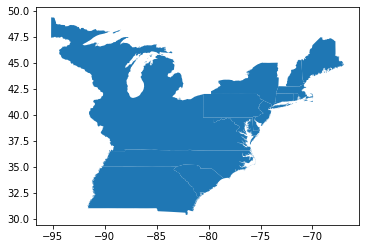

In [204]:
fig, ax = plt.subplots(1, 1)
map_df.plot(figsize=(800, 300), ax = ax)
plt.show()

In [205]:
with open('state_abbrev.json') as json_file:
    us_state_to_abbrev = json.load(json_file)

In [206]:
map_df['STATE'] = map_df['NAME'].apply(lambda x: us_state_to_abbrev[x])

In [207]:
debt_data = pd.read_csv("statewise_debt_aggregation_Pre1790.csv")

In [208]:
df_merged = map_df.merge(debt_data, left_on=['STATE'], right_on=['State key'])

In [209]:
df_merged.fillna(0, inplace = True)

In [210]:
df_merged

,ID_NUM,NAME,ID,VERSION,START_DATE,END_DATE,CHANGE,CITATION,START_N,END_N,...,TERR_TYPE,FULL_NAME,ABBR_NAME,NAME_START,geometry,STATE,State key,Loan Office Certificates Specie Value,State Liquidated Debt Dollars,Pierce Certificates Value
0,22,Connecticut,ct_state,1,1783-09-03,1786-09-13,Connecticut became an independent state on 4 J...,(Declaration of Independence),17830903,17860913,...,State,Connecticut,CT,Connecticut (1783-09-03),"MULTIPOLYGON (((-73.53351 41.03342, -73.53342 ...",CT,CT,1.275499e+06,1.354322e+05,1137988.73
1,28,Delaware,de_state,1,1783-09-03,2000-12-31,"The three Lower Counties, of KENT, NEW CASTLE,...","(Declaration of Independence; Swindler, 2:197)",17830903,20001231,...,State,Delaware,DE,Delaware (1783-09-03),"MULTIPOLYGON (((-75.07550 38.45357, -75.07546 ...",DE,DE,6.638712e+04,1.363059e+05,130868.22
2,42,Georgia,ga_state,1,1783-09-03,1798-04-06,Georgia became an independent state on 4 July ...,(Declaration of Independence),17830903,17980406,...,State,Georgia,GA,Georgia (1783-09-03),"MULTIPOLYGON (((-81.49930 30.81985, -81.49955 ...",GA,GA,0.000000e+00,0.000000e+00,93226.85
3,76,Massachusetts,ma_state,1,1783-09-03,1804-12-30,"Massachusetts, including the area of Maine, be...",(Declaration of Independence),17830903,18041230,...,State,Massachusetts,MA,Massachusetts (1783-09-03),"MULTIPOLYGON (((-70.80136 41.25818, -70.80443 ...",MA,MA,2.387481e+06,4.578235e+05,2217598.90
4,81,Maryland,md_state,1,1783-09-03,1791-03-29,Maryland became an independent state on 4 July...,(Declaration of Independence),17830903,17910329,...,State,Maryland,MD,Maryland (1783-09-03),"MULTIPOLYGON (((-76.01925 37.96971, -76.01758 ...",MD,MD,4.047050e+05,0.000000e+00,550014.80
5,116,North Carolina,nc_state,1,1783-09-03,1790-04-01,North Carolina became an independent state on ...,(Declaration of Independence),17830903,17900401,...,State,North Carolina,NC,North Carolina (1783-09-03),"MULTIPOLYGON (((-78.52934 33.86376, -78.53055 ...",NC,NC,0.000000e+00,0.000000e+00,329382.65
6,128,New Hampshire,nh_state,1,1783-09-03,2000-12-31,New Hampshire became an independent state on 4...,(Declaration of Independence),17830903,20001231,...,State,New Hampshire,NH,New Hampshire (1783-09-03),"MULTIPOLYGON (((-70.81586 42.88627, -70.81730 ...",NH,NH,3.001711e+05,1.382644e+04,380285.90
7,129,New Jersey,nj_state,1,1783-09-03,2000-12-31,New Jersey became an independent state on 4 Ju...,(Declaration of Independence),17830903,20001231,...,State,New Jersey,NJ,New Jersey (1783-09-03),"MULTIPOLYGON (((-74.81742 38.99838, -74.81850 ...",NJ,NJ,6.512044e+05,1.768007e+06,513348.62
8,143,New York,ny_state,1,1783-09-03,1855-01-10,New York became an independent state on 4 July...,(Declaration of Independence),17830903,18550110,...,State,New York,NY,New York (1783-09-03),"MULTIPOLYGON (((-73.60221 40.59481, -73.60542 ...",NY,NY,9.220057e+05,3.649823e+06,774934.83
9,155,Pennsylvania,pa_state,1,1783-09-03,1792-03-02,Pennsylvania became an independent state on 4 ...,(Declaration of Independence),17830903,17920302,...,State,Pennsylvania,PA,Pennsylvania (1783-09-03),"POLYGON ((-76.49967 41.99948, -76.47353 41.999...",PA,PA,3.778570e+06,2.257929e+06,1147498.52


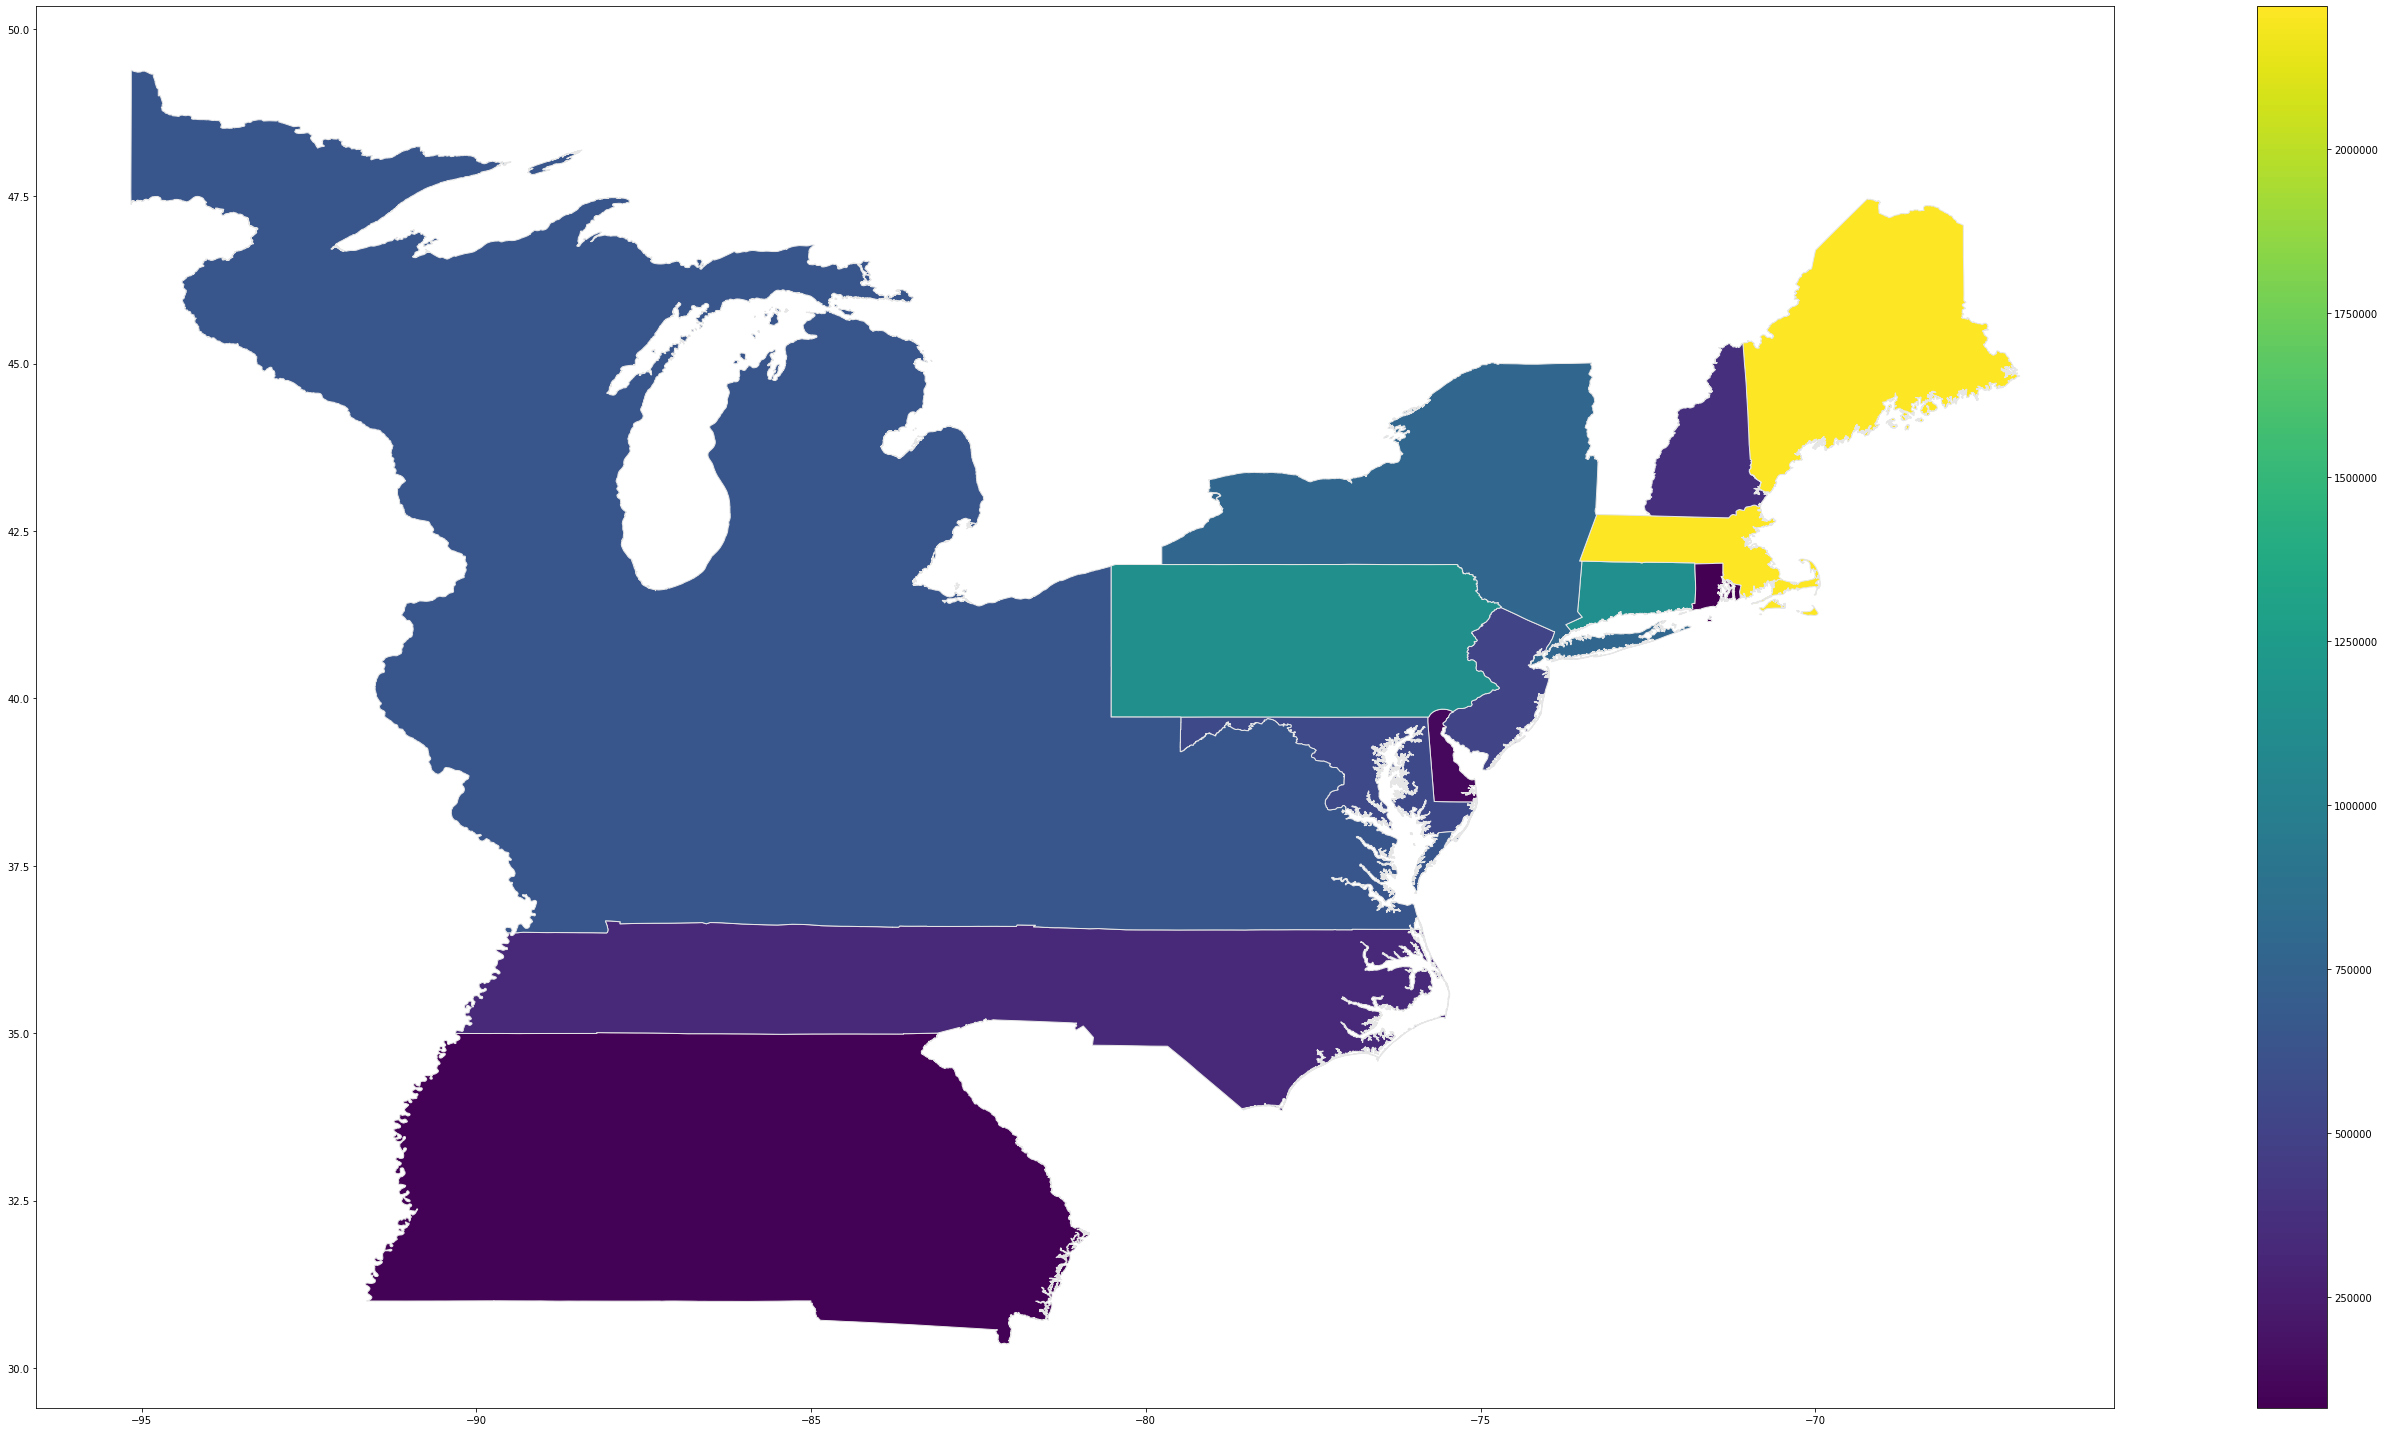

In [211]:
fig2, ax2 = plt.subplots(1, figsize = (40, 20))
fig = df_merged.plot(column='Pierce Certificates Value', linewidth=1, ax=ax2, edgecolor='0.9', legend = True)
plt.tight_layout()